In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

# Load Data

In [2]:
df = pd.read_csv("psi.csv", names=["GRADE", "PSI", "TUCE", "GPA"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GRADE   32 non-null     int64  
 1   PSI     32 non-null     int64  
 2   TUCE    32 non-null     int64  
 3   GPA     32 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.1 KB


In [4]:
# GRADE is the target column
df.describe()

GRADE        PSI       TUCE        GPA
count  32.000000  32.000000  32.000000  32.000000
mean    0.343750   0.437500  21.937500   3.117188
std     0.482559   0.504016   3.901509   0.466713
min     0.000000   0.000000  12.000000   2.060000
25%     0.000000   0.000000  19.750000   2.812500
50%     0.000000   0.000000  22.500000   3.065000
75%     1.000000   1.000000  25.000000   3.515000
max     1.000000   1.000000  29.000000   4.000000

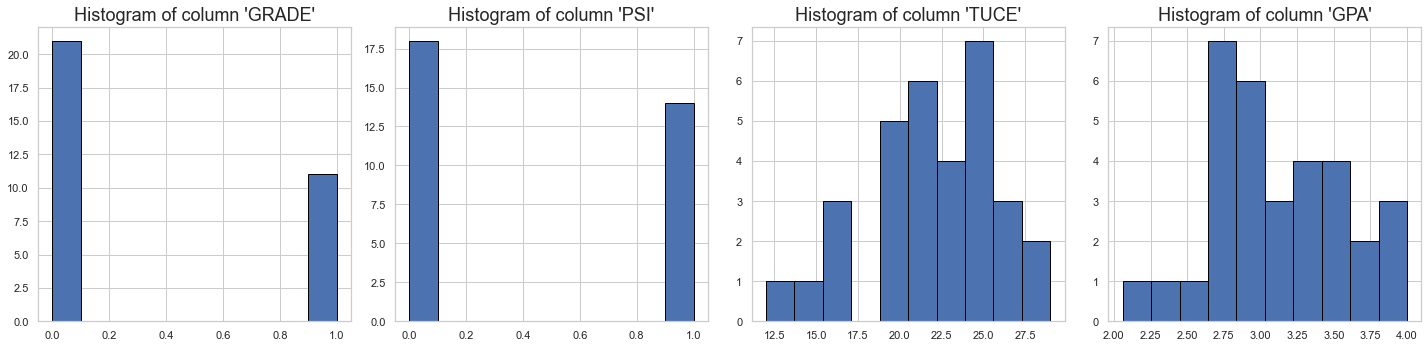

In [5]:
# Subplots
fig, axs = plt.subplots(nrows=1, ncols=len(df.columns))
fig.set_figwidth(20)
fig.set_figheight(5)
for i, col in enumerate(df.columns):
    axs[i].set_title(f"Histogram of column '{col}'", size=18)
    df[col].hist(edgecolor="black", ax=axs[i])
    fig.tight_layout()

# Logit Model
Logit Model is described as $$P(y_i=1|x_i)=\frac{e^{x_i'\beta}}{1+e^{x_i'\beta}}, \; x_i \in \mathbb{R^p} $$
- Coefficient vector $\beta$ is estimated using the Maximum-Likelihood approach.
- $y_i$ is nominal scaled dependent variable, e.g. $y=1$ if an event $E$ occurs, otherwise $y=0$

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [7]:
# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(df[["PSI", "TUCE", "GPA"]],
                                                    df["GRADE"],
                                                    test_size=0.20,
                                                    random_state=42)
# Preview X_train
X_train.head()
# Print information about sizes
print(f"X_train Shape = {X_train.shape}")
print(f"X_test Shape = {X_test.shape}")
print(f"y_train Shape = {y_train.shape}")
print(f"y_test Shape = {y_test.shape}")

X_train Shape = (25, 3)
X_test Shape = (7, 3)
y_train Shape = (25,)
y_test Shape = (7,)


In [8]:
# Fit model
clf = LogisticRegression(fit_intercept=True)
clf.fit(X_train, y_train);

# Print coefficients and intercept
print(f"Intercept: {clf.intercept_}")
print(f"Coefficients: {clf.coef_}")
print(f"Params: {clf.get_params()}")

Intercept: [-5.62517918]
Coefficients: [[1.07405012 0.07876129 0.8461425 ]]
Params: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


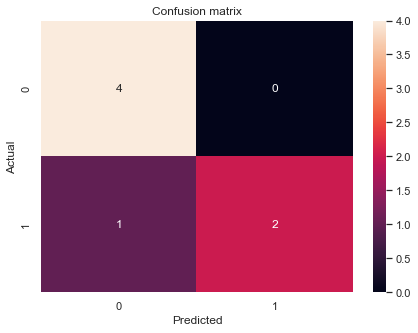

________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7

Information:
Precision: Percentage of correct positive predictions relative to total positive predictions
Recall: Percentage of correct positive predictions relative to total actual positives.
F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.
________________________________________________________________________________


In [9]:
# Predict values
y_pred = clf.predict(X_test)

# Plot Confusion matrics
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Heatmap plot settings
plt.figure(figsize=(7,5))
plt.title("Confusion matrix")
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot classification report
print(80 * "_")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Information:")
print("Precision: Percentage of correct positive predictions relative to total positive predictions")
print("Recall: Percentage of correct positive predictions relative to total actual positives.")
print("F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.")
print(80 * "_")

# Get Probablities of Prediction (Logit)
Can be used to define custom cut_off value for P(y=1|x) to draw ROC Curve.

In [10]:
X_test_prob = pd.DataFrame(X_test).copy()
predicted_probabilites = clf.predict_proba(X_test)
X_test_prob["P(y=0|x')"] = predicted_probabilites[:, 0]
X_test_prob["P(y=1|x')"] = predicted_probabilites[:, 1]

In [12]:
X_test_prob.head(10)

PSI  TUCE   GPA  P(y=0|x')  P(y=1|x')
29    1    23  4.00   0.344128   0.655872
15    0    19  2.74   0.859396   0.140604
24    1    24  3.54   0.417149   0.582851
17    0    19  2.83   0.849940   0.150060
8     0    25  3.03   0.748821   0.251179
9     0    29  3.92   0.506056   0.493944
30    1    21  3.10   0.568099   0.431901